# View images with Holoview

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : November 24th 2021 
- version v0

CCIN2P3:

- works with kernels **anaconda3_auxtel** (with libradtran) and **anaconda3_auxtel_v2** (no libradtran)
- works with kernel **python 3** locally 

# Scan

    # wide scan : HD 160617 
    # all_myseq_holo=range(234,310)
    # narrow scan :  HD 160617 
    # all_myseq_holo=range(317,365)


# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.7.0'

In [4]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [5]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

In [6]:
from distutils.dir_util import copy_tree

https://docs.astropy.org/en/stable/visualization/index.html#functions

In [7]:
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

In [8]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [9]:
from astroquery.simbad import Simbad
#import astropy.coordinates as coord

import astropy.units as u

In [10]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.table import Table

In [11]:
import numpy as np
import pandas as pd


In [12]:
# Bokeh for interactive visualization
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import holoviews as hv
from holoviews import streams, opts
from holoviews.operation.datashader import rasterize
from holoviews.operation.datashader import datashade, dynspread
from holoviews.plotting.util import process_cmap

import datashader as dsh


In [13]:
from holoviews import opts, streams

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
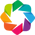

Loading BokehJS ...

In [14]:
# Set the holoviews plotting library to be bokeh
# You will see the holoviews + bokeh icons displayed when the library is loaded successfully
#hv.extension('bokeh')
hv.extension('bokeh', 'matplotlib')

# Display bokeh plots inline in the notebook
output_notebook()


In [15]:
# What versions of bokeh and holoviews nd datashader are we working with?
# This is important when referring to online documentation as
# APIs can change between versions.
print("Bokeh version: " + bokeh.__version__)
print("Holoviews version: " + hv.__version__)
print("Datashader version: " + dsh.__version__)

Bokeh version: 2.3.2
Holoviews version: 1.14.6
Datashader version: 0.13.0


# Configuration

In [16]:
version="v4.0"

## Path

In [17]:
# path index for each month
DATE="2021-07-07"
DATE2="2021_07_07"

In [18]:
# select if we run at CC or not (locally) 
HOSTCC=False

In [19]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2021/holo/quickLookExp_v2/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2021/holo/OutputSpectractor/"+DATE)
    
else:
    path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)

## Utility Functions

In [20]:
def file_tag_forsorting(filename):
    #m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m=re.findall('^holo4_003_*_(.*)_.*_quickLookExp[.]fits$',filename)
    #print(m)
    words=m[0].split("_")
    
    outputstring=words[1]
    
    if outputstring=="slew":
        outputstring+="_icrs"
    return outputstring

In [21]:
def file_target(filename):
    m=file_tag_forsorting(filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []
         

In [22]:
def is_nan(x):
    return (x != x)

# Logbook for input file selection

- the logbook contains all input image path and possibily the order 0 position

In [23]:
filename_logbook='logbooks/auxtelholologbook_'+DATE2+'_'+ version +'.csv'

In [24]:
df=pd.read_csv(filename_logbook,index_col=0)

In [25]:
pd.set_option('display.max_rows', None)

In [26]:
# show the list of input files from the logbook to select the file index in the logbook
df

index                     date  \
0        0  2021-07-08T02:50:31.569   
1        1  2021-07-08T02:51:12.101   
2        2  2021-07-08T02:51:21.256   
3        3  2021-07-08T02:51:30.934   
4        4  2021-07-08T02:51:40.885   
5        5  2021-07-08T02:51:50.381   
6        6  2021-07-08T02:51:59.759   
7        7  2021-07-08T02:52:10.113   
8        8  2021-07-08T02:52:19.262   
9        9  2021-07-08T02:52:29.022   
10      10  2021-07-08T03:09:18.381   
11      11  2021-07-08T03:09:51.483   
12      12  2021-07-08T03:10:22.899   
13      13  2021-07-08T03:10:54.635   
14      14  2021-07-08T03:14:25.113   
15      15  2021-07-08T03:18:49.728   
16      16  2021-07-08T03:22:35.058   
17      17  2021-07-08T03:27:28.637   
18      18  2021-07-08T03:31:49.398   
19      19  2021-07-08T03:33:02.383   
20      20  2021-07-08T03:33:40.416   
21      21  2021-07-08T03:34:18.506   
22      22  2021-07-08T03:34:56.504   
23      23  2021-07-08T03:35:34.622   
24      24  2021-07-08T03:36:12.773   
25      25  2021-07-08T03:36:51.324   
26      26  2021-07-08T03:37:29.434   
27      27  2021-07-08T03:38:07.561   
28      28  2021-07-08T03:38:45.707   
29      29  2021-07-08T03:39:23.969   
30      30  2021-07-08T03:40:02.136   
31      31  2021-07-08T03:40:40.864   
32      32  2021-07-08T03:41:19.059   
33      33  2021-07-08T03:41:57.407   
34      34  2021-07-08T03:42:35.608   
35      35  2021-07-08T03:43:13.804   
36      36  2021-07-08T03:43:52.018   
37      37  2021-07-08T03:44:30.763   
38      38  2021-07-08T03:45:08.962   
39      39  2021-07-08T03:45:47.206   
40      40  2021-07-08T03:46:25.307   
41      41  2021-07-08T03:47:03.492   
42      42  2021-07-08T03:47:41.807   
43      43  2021-07-08T03:48:20.795   
44      44  2021-07-08T03:48:58.912   
45      45  2021-07-08T03:49:37.128   
46      46  2021-07-08T03:50:15.298   
47      47  2021-07-08T03:50:53.476   
48      48  2021-07-08T03:51:31.752   
49      49  2021-07-08T03:52:10.906   
50      50  2021-07-08T03:52:49.130   
51      51  2021-07-08T03:53:27.487   
52      52  2021-07-08T03:54:05.770   
53      53  2021-07-08T03:54:44.149   
54      54  2021-07-08T03:55:22.356   
55      55  2021-07-08T03:57:27.244   
56      56  2021-07-08T04:01:50.450   
57      57  2021-07-08T04:04:12.555   
58      58  2021-07-08T04:05:06.367   
59      59  2021-07-08T04:05:38.880   
60      60  2021-07-08T04:06:11.311   
61      61  2021-07-08T04:06:43.769   
62      62  2021-07-08T04:07:16.223   
63      63  2021-07-08T04:07:48.665   
64      64  2021-07-08T04:08:21.107   
65      65  2021-07-08T04:08:54.078   
66      66  2021-07-08T04:09:26.572   
67      67  2021-07-08T04:09:59.052   
68      68  2021-07-08T04:10:31.515   
69      69  2021-07-08T04:11:03.986   
70      70  2021-07-08T04:11:36.404   
71      71  2021-07-08T04:12:08.868   
72      72  2021-07-08T04:22:19.093   
73      73  2021-07-08T04:22:52.079   
74      74  2021-07-08T04:23:23.868   
75      75  2021-07-08T04:27:28.703   
76      76  2021-07-08T04:49:32.013   
77      77  2021-07-08T04:50:04.270   
78      78  2021-07-08T04:50:36.514   
79      79  2021-07-08T04:51:08.758   
80      80  2021-07-08T04:51:41.005   
81      81  2021-07-08T04:52:13.265   
82      82  2021-07-08T04:52:45.515   
83      83  2021-07-08T04:53:18.264   
84      84  2021-07-08T04:53:50.521   
85      85  2021-07-08T04:54:22.770   
86      86  2021-07-08T04:54:55.016   
87      87  2021-07-08T04:55:27.314   
88      88  2021-07-08T04:55:59.559   
89      89  2021-07-08T04:56:31.807   
90      90  2021-07-08T04:57:04.543   
91      91  2021-07-08T04:57:36.808   
92      92  2021-07-08T04:58:09.080   
93      93  2021-07-08T04:58:41.316   
94      94  2021-07-08T04:59:13.646   
95      95  2021-07-08T04:59:45.917   
96      96  2021-07-08T05:00:18.159   
97      97  2021-07-08T05:00:50.866   
98      98  2021-07-08T05:01:23.102   
99      99  2021-07-08T05:01:55.386   
100    100  2021-07-08T05:02:27.623   
101    101  2021-07-08T05:0

# Selection of input file
- the input file is selected from the logbook list above

In [27]:
# wide scan : HD 160617 
# all_myseq_holo=range(234,310)

# narrow scan :  HD 160617 
# all_myseq_holo=range(317,365)

In [28]:
#idx=76
#idx=96
#idx=109
idx=76 # beginning of narrow scan

In [29]:
target_name=df.iloc[idx]['object']
disperser_name=df.iloc[idx]['disperser']
filename_name=df.iloc[idx]['file']

In [30]:
sky_coord_target=SkyCoord.from_name(target_name)
sky_coord_target

<SkyCoord (ICRS): (ra, dec) in deg
    (265.705515, -40.32097381)>

In [31]:
print(df.iloc[idx]['file'])

holo4_003_empty_HD160617_20210707_000317_quickLookExp.fits


In [32]:
print(df.iloc[idx])

index                                                         76
date                                     2021-07-08T04:49:32.013
path           /Users/dagoret/DATA/AuxTelData2021/holo/quickL...
file           holo4_003_empty_HD160617_20210707_000317_quick...
num                                                          317
object                                                  HD160617
filter                                                   empty_1
disperser                                              holo4_003
airmass                                                 1.065945
exposure                                                    20.0
focus                                                  -1.577194
seeing                                                       NaN
pressure                                                  742.25
temperature                                                 12.3
humidity                                                     6.0
windspd                  

In [33]:
myhome=os.getenv("HOME")

In [34]:
dir_images=path_images

In [35]:
filename_image=df['file'][idx]
filename_image

'holo4_003_empty_HD160617_20210707_000317_quickLookExp.fits'

In [36]:
file_target(filename_image)

'HD160617'

## If order 0 position exists in logbook it is selected, otherwise put it by hand

In [37]:
x0=df['Obj-posXpix'][idx]
y0=df['Obj-posYpix'][idx]

In [38]:
FLAG_ORDER0_LOCATION=False

In [39]:
if not is_nan(x0)and not is_nan(y0):
    FLAG_ORDER0_LOCATION=True
    print("Order 0 location from logbook : ({},{})".format(x0,y0))
else:
    print("NO Order 0 location from logbook ! ")      

Order 0 location from logbook : (500.0,1900.0)


In [40]:
fullfilename = os .path.join(path_images,filename_image)

In [41]:
from astropy.io import fits

In [42]:
hdu = fits.open(filename_image)

In [43]:
# extract header and the image
header=hdu[0].header
image=hdu[0].data

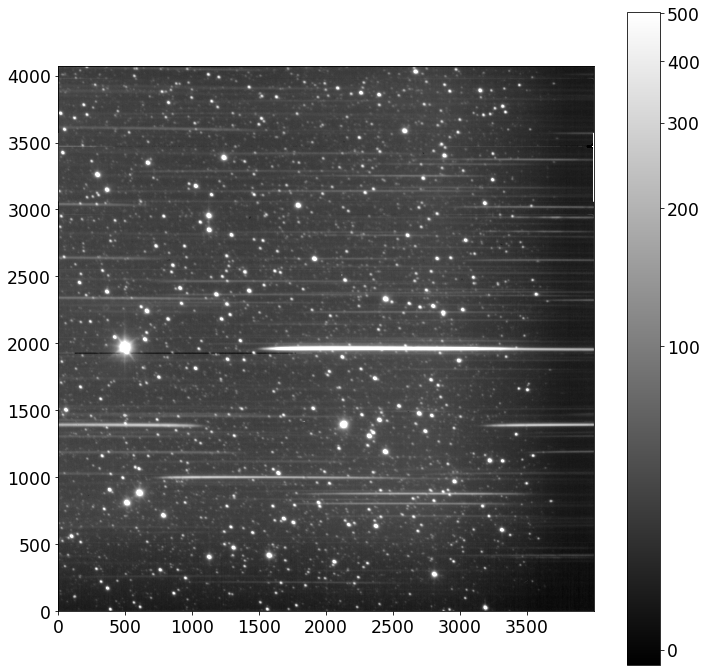

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ImageNormalize normalizes values to [0,1] before applying the stretch
# Create an ImageNormalize object
norm = ImageNormalize(image, interval=PercentileInterval(99.),stretch=AsinhStretch())
im = ax.imshow(np.rot90(image), origin='lower', norm=norm, cmap='gray')
fig.colorbar(im)

# Transform the image

In [45]:
transform = AsinhStretch() + PercentileInterval(99.)
#transform = AsinhStretch() + ZScaleInterval()

In [46]:
scaledImage=transform(image)

# Rotation

In [47]:
rotscaledImage=np.rot90(scaledImage)

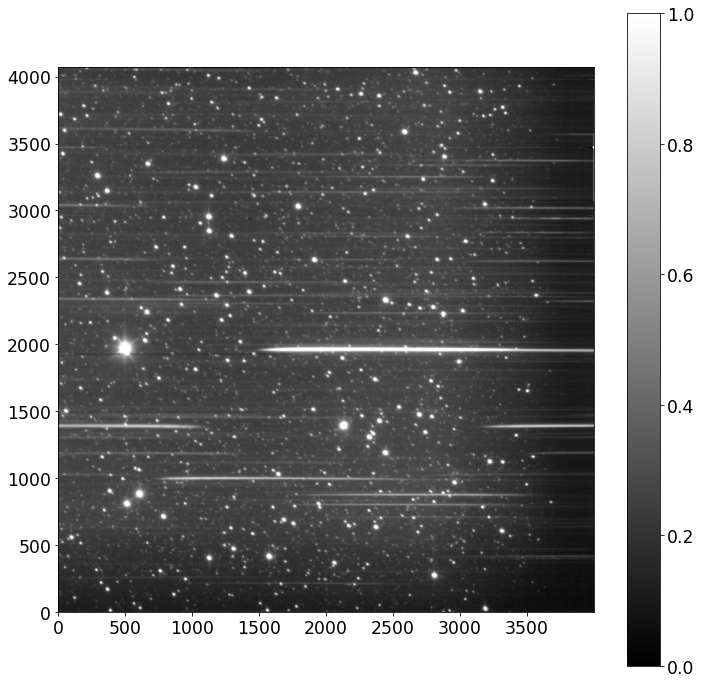

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ImageNormalize normalizes values to [0,1] before applying the stretch
im = ax.imshow(rotscaledImage, origin='lower', cmap='gray')
fig.colorbar(im)

# Holoview

In [63]:
from holoviews import streams
listing = ', '.join(sorted([str(s.name) for s in param.descendents(streams.LinkedStream)]))
print('The linked stream classes supported by HoloViews are:\n\n{listing}'.format(listing=listing))

NameError: name 'param' is not defined

## Stream with a pointer

In [50]:
# Define some default plot options for the Image
img_opts = dict(
                #height=600, width=700, 
                xaxis="bottom", 
                padding = 0.01, fontsize={'title': '8pt'},
                colorbar=True, toolbar='right', show_grid=True,
                aspect='equal',
                frame_width=800,
                tools=['hover']
               )     

In [60]:
# Create the Image element.
bounds_img=(0,0,rotscaledImage.shape[1],rotscaledImage.shape[0])
img = hv.Image(rotscaledImage, bounds=bounds_img,
               kdims=['x', 'y']).opts(
    cmap = "Greys_r",  xlabel = 'X', ylabel ='Y',
    title = filename_name,
    **img_opts)

In [61]:
def cross_hair_info(x, y):
    text = hv.Text(x+0.05, y, '%.3f'% img[x,y], halign='left', valign='bottom')
    return hv.HLine(y) * hv.VLine(x) * text

pointer = streams.PointerXY(x=0, y=0, source=img)

In [62]:
rasterize(img) * hv.DynamicMap(cross_hair_info, streams=[pointer])
#rasterize(img) 

:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (z)
      .HLine.I :HLine   [x,y]
      .VLine.I :VLine   [x,y]
      .Text.I  :Text   [x,y]

## Stream with a Box

In [53]:
boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=img, bounds=boundsxy)
dynamicMap = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

In [54]:
# Display the image and overlay the DynamicMap
rasterize(img) * dynamicMap.opts(color='white')

:DynamicMap   []
   :Overlay
      .Image.I  :Image   [x,y]   (z)
      .Bounds.I :Bounds   [x,y]

In [55]:
box

BoundsXY(bounds=(0, 0, 0, 0))

## stream with a TAP

In [56]:
posxy = hv.streams.Tap(source=img, x=0.5 * rotscaledImage.shape[1],
                       y=0.5 * rotscaledImage.shape[0])
marker = hv.DynamicMap(lambda x, y: hv.Points([(x, y)]), streams=[posxy])
rasterize(img)* marker.opts(color='white', marker='x', size=20)

:DynamicMap   []
   :Overlay
      .Image.I  :Image   [x,y]   (z)
      .Points.I :Points   [x,y]

In [57]:
print('The scaled/raw value at position (%.3f, %.3f)' %
      (posxy.x, posxy.y))

The scaled/raw value at position (2000.000, 2036.000)


## PolyDraw streams

http://holoviews.org/reference/streams/bokeh/PolyDraw.html

In [58]:
path = hv.Path([[(100, 100), (3500, 3500)]])
poly = hv.Polygons([[(2, 2), (5, 8), (8, 2)]])
path_stream = streams.PolyDraw(source=path, drag=True, show_vertices=True,num_objects=1)
poly_stream = streams.PolyDraw(source=poly, drag=True, num_objects=4,
                               show_vertices=True, styles={
                                   'fill_color': ['red', 'green', 'blue']
                               })

#(path * poly).opts(
#    opts.Path(color='red', height=800, line_width=5, width=1200),
#    opts.Polygons(fill_alpha=0.3, active_tools=['poly_draw']))
#img*(path*poly)

pointer = streams.PointerXY(x=0, y=0, source=img)


path.opts(opts.Path(color='red', height=800, line_width=3, width=100, active_tools=['poly_draw']))
rasterize(img) * path


2021-11-24 14:38:21  param.OverlayPlot05482 __db_print           WARNING Due to internal constraints, when aspect and width/height is set, the bokeh backend uses those values as frame_width/frame_height instead. This ensures the aspect is respected, but means that the plot might be slightly larger than anticipated. Set the frame_width/frame_height explicitly to suppress this warning.


:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (z)
      .Path.I  :Path   [x,y]

In [59]:
path_stream.data

{'xs': [array([ 100, 3500])], 'ys': [array([ 100, 3500])]}